# Import libraries

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display


## Import Functions

### dslabs_functions

In [2]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [3]:
%run "scripts/data_functions.py"


dslabs_functions lodaded
data_functions lodaded


# Load

In [5]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_data_prep_encoded.csv'


file_tag = 'Citi Bike'

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

In [11]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

#id_cols=['ride_id','start_time', 'end_time','start_station','end_station','start_station_id','end_station_id','start_lat','start_lng', 'end_lat', 'end_lng','wmo_weather_code','snowfall_cm','ride_duration_sec']
##remove also col = 'snowfall_cm' because it has only 0 values in our dataset
##remove also start_station and end_Station = they have too many unique values(around 2k) which will make the encoding process very slow
#
#df=df.drop(columns=id_cols, axis=1)

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 39 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   bike_type                           int64  
 1   user_type                           int64  
 2   day_of_month                        int64  
 3   is_weekend                          int64  
 4   ride_duration_min                   float64
 5   temperature_2m                      float64
 6   rain_mm                             float64
 7   cloud_cover_low_pct                 int64  
 8   wind_speed_10m                      float64
 9   ride_distance_km                    float64
 10  ride_avg_speed                      float64
 11  time_of_day_sin                     float64
 12  time_of_day_cos                     float64
 13  day_of_week_sin                     float64
 14  day_of_week_cos                     float64
 15  hour_sin                            float64
 16  

bike_type  user_type  day_of_month  is_weekend  ride_duration_min  \
0          1          1            27           1           9.161483   
1          1          1            25           0           4.639433   
2          1          1             6           1           6.865817   
3          1          1             6           1           2.289150   
4          1          1            10           0           7.947850   
5          1          1             7           1          27.290533   
6          1          1            25           0          10.656417   
7          1          1            14           1          23.607000   
8          1          1            17           0          10.698533   
9          1          1            26           0           7.501383   

   temperature_2m  rain_mm  cloud_cover_low_pct  wind_speed_10m  \
0            14.3      0.0                   16            25.3   
1            11.2      0.0                    0            13.7   
2             9.6      0.0                   95            27.9   
3            10.7      0.0                   11            25.4   
4            15.0      0.0                   44            10.7   
5            13.4      0.0                    0            22.3   
6             7.9      0.0                    0            15.4   
7            20.8      0.0                    0            21.3   
8            15.4      0.0                   79            18.2   
9            10.4      0.0                    0             4.4   

   ride_distance_km  ...  end_borough_Staten Island  \
0          2.037884  ...                          0   
1          1.447460  ...                          0   
2          1.785276  ...                          0   
3          0.431973  ...                          0   
4          1.376807  ...                          0   
5          2.404062  ...                          0   
6          2.072039  ...                          0   
7          4.927812  ...                          0   
8          2.572462  ...                          0   
9          1.758236  ...                          0   

   wmo_weather_desc_Clear sky  wmo_weather_desc_Drizzle: Dense  \
0                           0                                0   
1                           1                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   
5                           0                                0   
6                           1                                0   
7                           0                                0   
8                           0                                0   
9                           1                                0   

   wmo_weather_desc_Drizzle: Light  wmo_weather_desc_Drizzle: Moderate  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   
5                                0                                   0   
6                                0                                   0   
7                                0                                   0   
8                                0                                   0   
9                                0                                   0   

   wmo_weather_desc_Mainly clear  wmo_weather_desc_Overcast  \
0                              0                          1   
1                              0                          0   
2                              0                          1   
3                              0                          1   
4        

In [13]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
bike_type                                   2
user_type                                   2
day_of_month                               31
is_weekend                                  2
ride_duration_min                     1410275
temperature_2m                            214
rain_mm                                    30
cloud_cover_low_pct                        73
wind_speed_10m                            258
ride_distance_km                      2194836
ride_avg_speed                        3159469
time_of_day_sin                             6
time_of_day_cos                             5
day_of_week_sin                             7
day_of_week_cos                             7
hour_sin                                   13
hour_cos                                   13
start_borough_Bronx                         2
start_borough_Brooklyn                      2
start_borough_Jersey City 

# Outlier Analysis

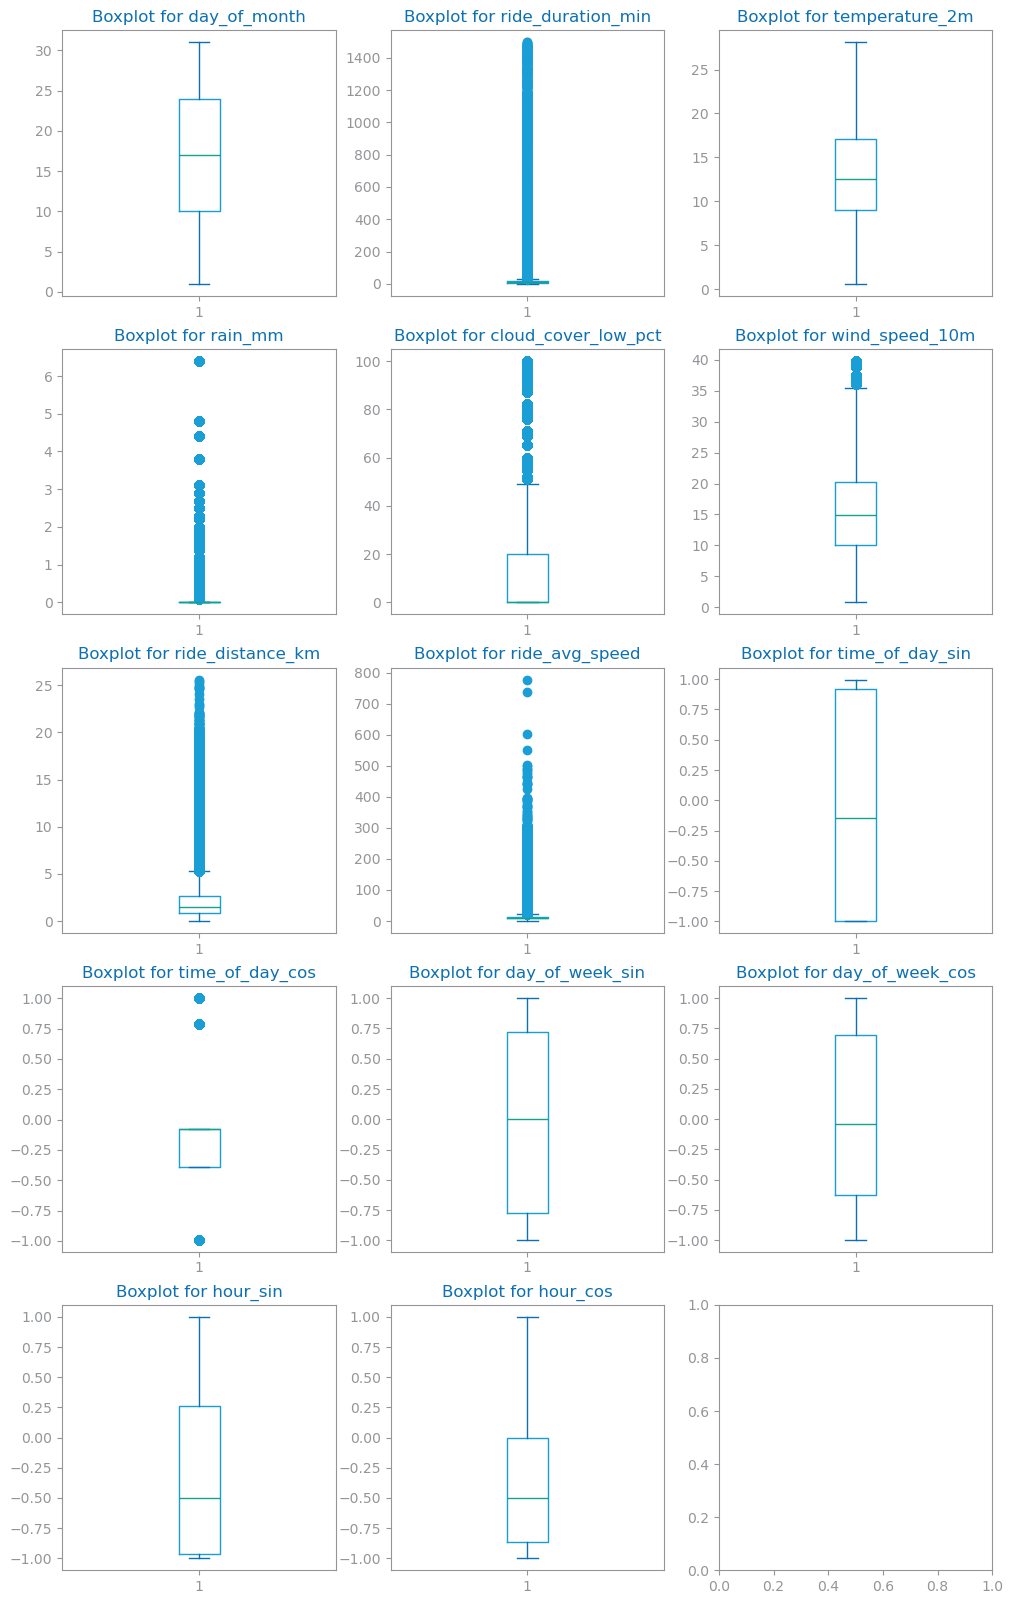

In [16]:

variable_types: dict[str, list] = get_variable_types(df)

numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

Inisghts:
- There are some numeric variables in  the dataset, athat accoridngly to the boxsplot might have some outliers whort analyse if they need to be removed or not:
    - ride_distance_km
    - ride_avg_speed
    - rain_mm
    - cloud_cover_low_pct
    - wind_speed_10m
    - ride_duration_min


# Summary5 and var selection

#### Checking outliers

### in std_deviation, with NR_STDEV = 2

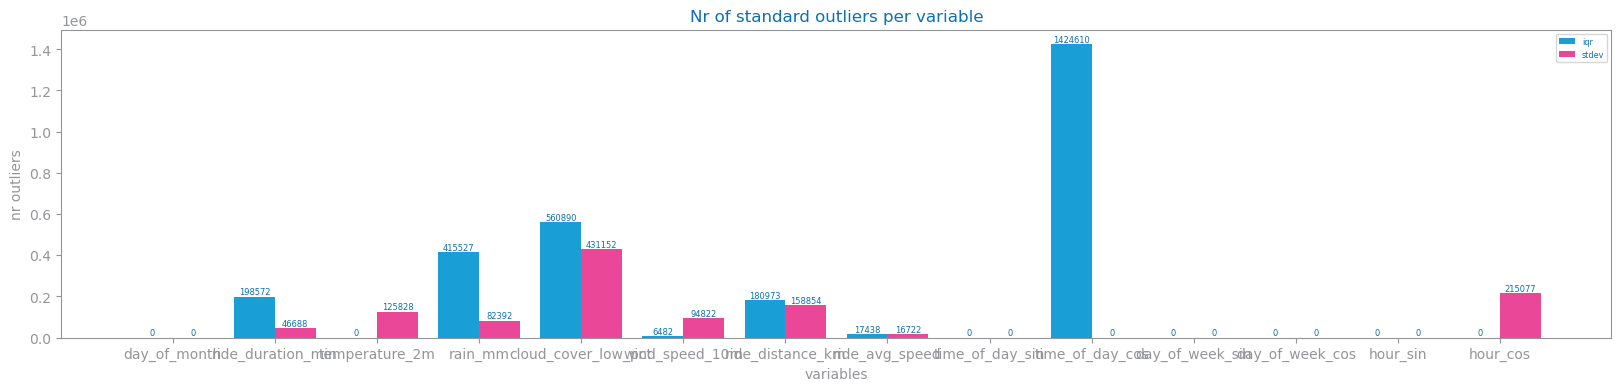

In [123]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

#This is the number of times * Standartdeviation.  
#Outliers are defined as values that are a certain distance from the mean, determined by the number of standard deviations you specified
#the higher the nr_stdev_ less outliers ww will have
NR_STDEV: int = 2


IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}

# Usar a função get_variable_types() para obter as variáveis numéricas
variable_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(20, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

### in std_deviation, with NR_STDEV = 3

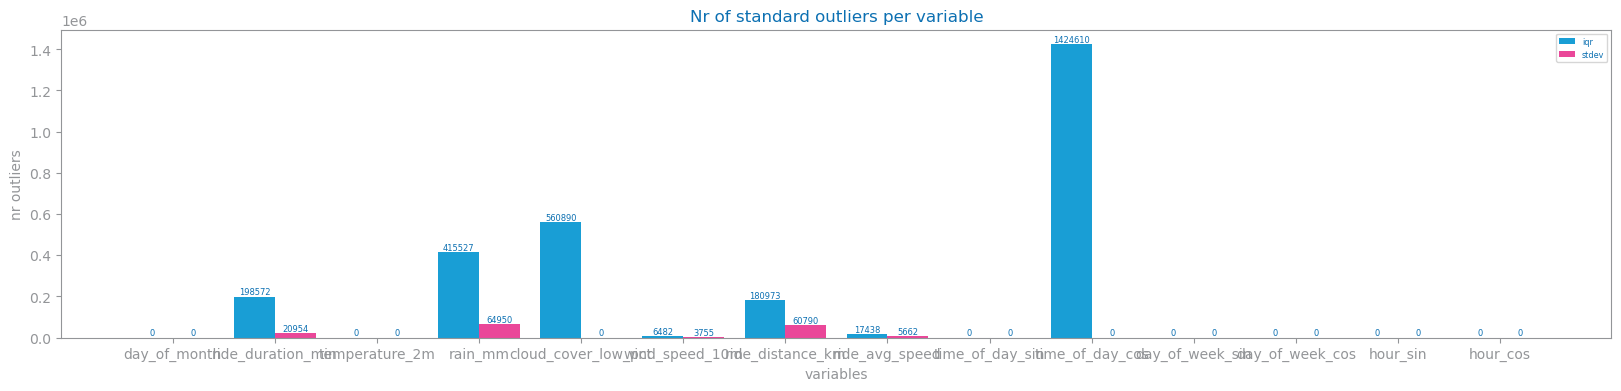

In [124]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

#This is the number of times * Standartdeviation.  
#Outliers are defined as values that are a certain distance from the mean, determined by the number of standard deviations you specified
#the higher the nr_stdev_ less outliers ww will have
NR_STDEV: int = 3


IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}

# Usar a função get_variable_types() para obter as variáveis numéricas
variable_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(20, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

### Insights

- There are some numeric variables in  the dataset, athat accoridngly to the boxsplot might have some outliers whort analyse if they need to be removed or not:
    - ride_distance_km
    - ride_avg_speed
    - rain_mm
    - cloud_cover_low_pct
    - wind_speed_10m
    - ride_duration_min

# Outliers Removal Strategies


## Out 1  - Truncating outliers


In [132]:
def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = None
) -> tuple[float, float]:
    if threshold is None:
        threshold = NR_STDEV  # Garante que usa o valor atualizado
    
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom



- using nr_stdev=3

In [137]:
def apply_strategy_1(df: DataFrame, summary5: DataFrame, numeric: list[str], threshold: float) -> DataFrame:
    df_copy = df.copy()

    # Filter the numeric variables to only include those in continuous_vars
    numeric_vars = [var for var in numeric if var in df_copy.columns]
    
    if numeric_vars:
        print("Data before truncating outliers:", df.shape)
        
        for var in numeric_vars:
            # Calculate the outlier thresholds for the variable using summary5
            top, bottom = determine_outlier_thresholds_for_var(summary5[var], threshold=threshold)
            
            # Truncate outliers for each variable
            df_copy[var] = df_copy[var].apply(
                lambda x: top if x > top else bottom if x < bottom else x
            )
        
        print("Data after truncating outliers:", df_copy.shape)
        print("threshold (nr_std_dev_used):", threshold)  # Agora funciona corretamente
    else:
        print("None of the specified continuous variables are in the dataset.")
    
    return df_copy


# Definir NR_STDEV antes de chamar a função
NR_STDEV = 3

# Calcular as estatísticas antes de chamar a função
summary5 = df.describe()

# Chamar a função passando NR_STDEV explicitamente
df_1 = apply_strategy_1(df, summary5, numeric, threshold=NR_STDEV)


Data before truncating outliers: (3193597, 39)
Data after truncating outliers: (3193597, 39)
threshold (nr_std_dev_used): 3


In [138]:
# Verificar quais colunas foram alteradas e coletar informações
altered_info = {}
# Definindo as variáveis contínuas que desejas monitorar

for var in numeric:
    if var in df.columns and var in df_1.columns:  # Verifica se a variável existe em ambos os DataFrames
        altered_indices = df.index[df[var] != df_1[var]].tolist()
        if altered_indices:
            altered_count = len(altered_indices)
            new_values = df_1.loc[altered_indices, var].to_list()
            altered_info[var] = {'altered_count': altered_count, 'new_values': new_values}

# Imprimir informações das colunas alteradas
for var, info in altered_info.items():
    print(f"Coluna '{var}' foi alterada. Número de linhas alteradas: {info['altered_count']}. Novos valores: {info['new_values']}")


Coluna 'ride_duration_min' foi alterada. Número de linhas alteradas: 20954. Novos valores: [75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.18026175135103, 75.180261751351

In [136]:
for var in numeric:
    top, bottom = determine_outlier_thresholds_for_var(summary5[var], threshold=2)
    print(f"NR_STDEV=2 -> {var}: Top={top}, Bottom={bottom}")
    print(f"Outliers acima: {(df[var] > top).sum()}")
    print(f"Outliers abaixo: {(df[var] < bottom).sum()}")

NR_STDEV=2 -> day_of_month: Top=33.19583887829094, Bottom=0.12954688578636464
Outliers acima: 0
Outliers abaixo: 0
NR_STDEV=2 -> ride_duration_min: Top=54.459591240268374, Bottom=-28.423090804062234
Outliers acima: 46688
Outliers abaixo: 0
NR_STDEV=2 -> temperature_2m: Top=23.626719296106685, Bottom=2.550836857659762
Outliers acima: 106231
Outliers abaixo: 19597
NR_STDEV=2 -> rain_mm: Top=0.8076606523546667, Bottom=-0.6489403128753898
Outliers acima: 82392
Outliers abaixo: 0
NR_STDEV=2 -> cloud_cover_low_pct: Top=89.63343292115458, Bottom=-49.70115154689226
Outliers acima: 431152
Outliers abaixo: 0
NR_STDEV=2 -> wind_speed_10m: Top=29.844421839774142, Bottom=0.9863639481634152
Outliers acima: 88091
Outliers abaixo: 6731
NR_STDEV=2 -> ride_distance_km: Top=5.509803900606876, Bottom=-1.4962088755078482
Outliers acima: 158854
Outliers abaixo: 0
NR_STDEV=2 -> ride_avg_speed: Top=22.225180643501517, Bottom=-0.24941571960843056
Outliers acima: 16722
Outliers abaixo: 0
NR_STDEV=2 -> time_of_d

In [129]:
for var in numeric:
    top, bottom = determine_outlier_thresholds_for_var(summary5[var], threshold=3)
    print(f"NR_STDEV=3 -> {var}: Top={top}, Bottom={bottom}")
    print(f"Outliers acima: {(df[var] > top).sum()}")
    print(f"Outliers abaixo: {(df[var] < bottom).sum()}")

NR_STDEV=3 -> day_of_month: Top=41.46241187641709, Bottom=-8.137026112339782
Outliers acima: 0
Outliers abaixo: 0
NR_STDEV=3 -> ride_duration_min: Top=75.18026175135103, Bottom=-49.143761315144886
Outliers acima: 20954
Outliers abaixo: 0
NR_STDEV=3 -> temperature_2m: Top=28.89568990571842, Bottom=-2.718133751951969
Outliers acima: 0
Outliers abaixo: 0
NR_STDEV=3 -> rain_mm: Top=1.1718108936621807, Bottom=-1.0130905541829038
Outliers acima: 64950
Outliers abaixo: 0
NR_STDEV=3 -> cloud_cover_low_pct: Top=124.46707903816629, Bottom=-84.53479766390397
Outliers acima: 0
Outliers abaixo: 0
NR_STDEV=3 -> wind_speed_10m: Top=37.05893631267682, Bottom=-6.228150524739267
Outliers acima: 3755
Outliers abaixo: 0
NR_STDEV=3 -> ride_distance_km: Top=7.2613070946355585, Bottom=-3.24771206953653
Outliers acima: 60790
Outliers abaixo: 0
NR_STDEV=3 -> ride_avg_speed: Top=27.843829734278998, Bottom=-5.868064810385915
Outliers acima: 5662
Outliers abaixo: 0
NR_STDEV=3 -> time_of_day_sin: Top=2.28469056496

## Out 2 - drop outlier strategy


### Out 2 strategy aplication

- using nr_stdev=3

In [154]:
from pandas import DataFrame, Series

def apply_strategy_2(df: DataFrame, summary5: DataFrame, nr_stdev: float = 2) -> DataFrame:
    df_copy = df.copy()

    # Definindo as variáveis contínuas específicas que desejas monitorar
    
    # Filtrar apenas as variáveis contínuas que existem no DataFrame
    numeric_vars = [var for var in numeric if var in df_copy.columns]

    if numeric_vars:
        print(f"Data before dropping outliers with nr_stdev={nr_stdev}:", df_copy.shape)
        
        # Armazenar informações sobre os outliers
        outlier_info = {}

        for var in numeric_vars:
            # Calcular os limites de outlier para a variável usando o número de desvios padrão
            mean = summary5[var]['mean']
            std = summary5[var]['std']
            
            top = mean + nr_stdev * std
            bottom = mean - nr_stdev * std
            
            # Identificar os outliers
            outliers: Series = df_copy[(df_copy[var] > top) | (df_copy[var] < bottom)]
            
            # Se houver outliers, armazenar as informações
            if not outliers.empty:
                outlier_info[var] = {
                    'outlier_indices': outliers.index.tolist(),
                    'outlier_count': outliers.shape[0],
                    'outlier_values': outliers[var].tolist()
                }

                # Remover outliers
                df_copy.drop(outliers.index, axis=0, inplace=True)
        
        print(f"Data after dropping outliers with nr_stdev={nr_stdev}:", df_copy.shape)

        # Imprimir informações sobre os outliers removidos apenas para as variáveis com outliers
        if outlier_info:
            for var, info in outlier_info.items():
                print(f"Variable '{var}':")
                print(f"  Number of outliers removed: {info['outlier_count']}")
                print(f"  Indices of outliers: {info['outlier_indices']}")
                print(f"  Values of outliers: {info['outlier_values']}")
                print()  # Linha em branco para melhor legibilidade
        else:
            print("No outliers were removed.")
    else:
        print("There are no numeric variables")

    return df_copy

# Usar a função
summary5 = df.describe()  # Calcular o resumo estatístico apenas para as variáveis de interesse
nr_stdev = 3  # Exemplo, mas pode ser alterado para 3 ou outro valor

df_2 = apply_strategy_2(df, summary5, nr_stdev)


Data before dropping outliers with nr_stdev=3: (3193597, 39)
Data after dropping outliers with nr_stdev=3: (3045355, 39)
Variable 'ride_duration_min':
  Number of outliers removed: 20954
  Indices of outliers: [18, 19, 20, 161, 210, 279, 363, 513, 546, 662, 946, 1306, 1438, 1482, 1593, 1641, 1791, 1976, 2037, 2569, 2646, 2954, 3013, 3060, 3075, 3076, 3279, 3758, 3841, 3870, 4014, 4081, 4170, 4698, 4708, 5164, 5165, 5240, 5413, 5583, 6375, 6406, 6463, 6464, 6845, 7044, 7265, 7309, 7658, 7676, 7701, 7795, 7871, 7988, 8257, 8290, 8353, 8658, 8777, 8778, 8790, 9106, 9343, 9529, 9747, 9761, 9834, 9885, 10439, 10463, 10601, 10618, 10659, 10668, 10675, 10685, 10758, 11057, 11110, 11480, 11538, 11575, 11893, 11984, 12069, 12079, 12080, 12081, 12115, 12740, 12800, 12843, 12914, 13001, 13210, 13255, 13653, 14135, 14416, 14681, 14830, 14842, 15935, 16314, 16502, 16738, 16858, 17025, 17313, 17544, 17795, 17800, 17802, 17905, 17928, 17929, 17930, 17931, 17945, 17946, 17947, 18052, 18075, 18312, 183

In [150]:
df.head()
display(df.shape)
display(df_1.shape)
display(df_2.shape)

(3193597, 39)

(3193597, 39)

(3045355, 39)

- Insights:
    - For now, we will consider the df_2, because we feel its more correct to remove the ouliers from the dataset.
    - New shape of the dataset
        - old_(3193597, 39)
        - new_(3045355, 39)
    - Variables changed after removal of outliers
        - ride_duration_min
        - rain_mm
        - wind_speed_10m
        - ride_distance_km
        - ride_avg_speed

# save to csv

In [158]:
if test_data == False:
    data_save = df.copy()

    # apply winning strategy com nr_stdev=3
    data_save = apply_strategy_2(data_save, summary5, nr_stdev=3)
        
    data_save.to_csv(f"data/df_citibike_data_prep_outliers.csv", index=False)
    
    print(data_save.columns)


Data before dropping outliers with nr_stdev=3: (3193597, 39)
Data after dropping outliers with nr_stdev=3: (3045355, 39)
Variable 'ride_duration_min':
  Number of outliers removed: 20954
  Indices of outliers: [18, 19, 20, 161, 210, 279, 363, 513, 546, 662, 946, 1306, 1438, 1482, 1593, 1641, 1791, 1976, 2037, 2569, 2646, 2954, 3013, 3060, 3075, 3076, 3279, 3758, 3841, 3870, 4014, 4081, 4170, 4698, 4708, 5164, 5165, 5240, 5413, 5583, 6375, 6406, 6463, 6464, 6845, 7044, 7265, 7309, 7658, 7676, 7701, 7795, 7871, 7988, 8257, 8290, 8353, 8658, 8777, 8778, 8790, 9106, 9343, 9529, 9747, 9761, 9834, 9885, 10439, 10463, 10601, 10618, 10659, 10668, 10675, 10685, 10758, 11057, 11110, 11480, 11538, 11575, 11893, 11984, 12069, 12079, 12080, 12081, 12115, 12740, 12800, 12843, 12914, 13001, 13210, 13255, 13653, 14135, 14416, 14681, 14830, 14842, 15935, 16314, 16502, 16738, 16858, 17025, 17313, 17544, 17795, 17800, 17802, 17905, 17928, 17929, 17930, 17931, 17945, 17946, 17947, 18052, 18075, 18312, 183